<a href="https://colab.research.google.com/github/uSarvar/Task-2-Prediction-airline-passengers-satisfaction/blob/main/2_task_(Airline_passenger_satisfaction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/train_dataset.csv')
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Female,Loyal Customer,54,Personal Travel,Eco,1068,1,4,1,...,4,4,1,4,4,4,3,21,12.0,0
9996,9997,Female,Loyal Customer,54,Business travel,Eco Plus,1399,4,1,1,...,4,4,4,4,1,4,4,34,21.0,0
9997,9998,Male,Loyal Customer,46,Business travel,Business,1440,3,3,2,...,4,4,4,4,3,4,3,37,38.0,1
9998,9999,Female,Loyal Customer,41,Business travel,Business,90,4,1,4,...,3,4,5,5,5,4,5,64,210.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fee7134f0>,
      dtype=object)

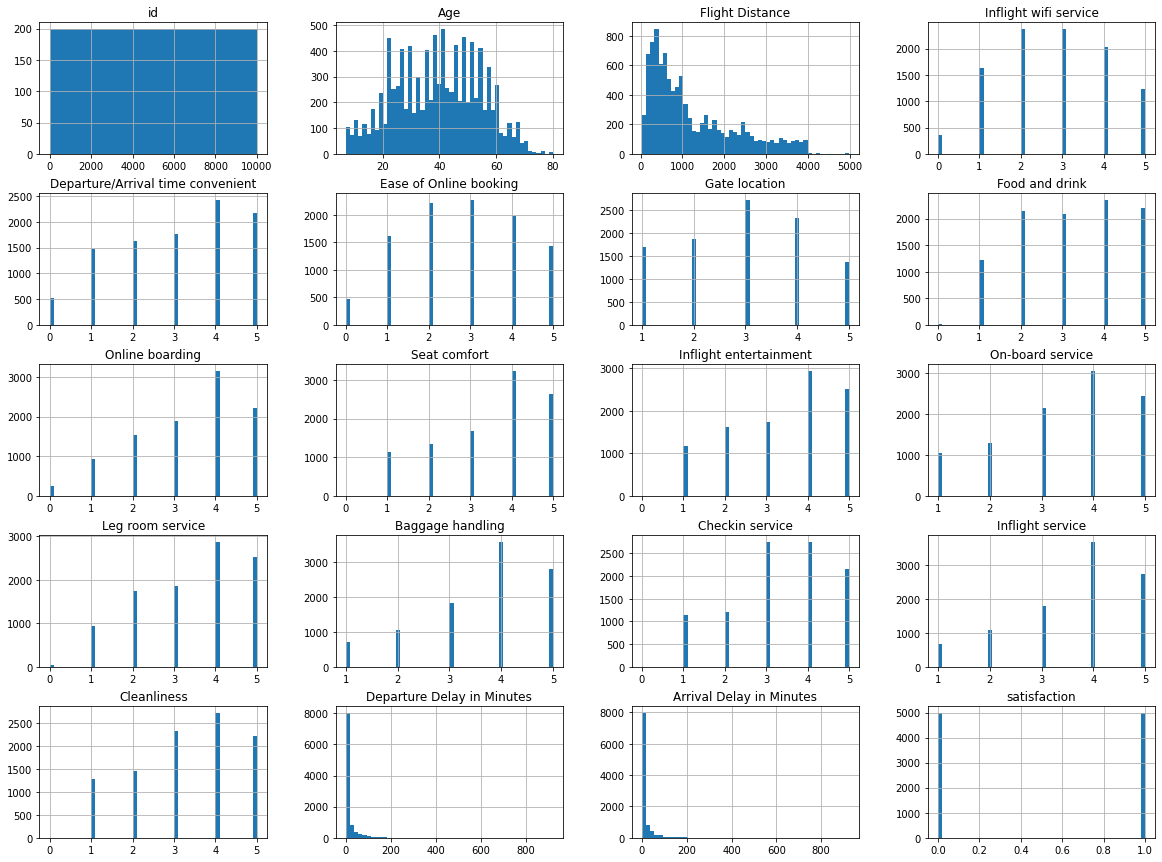

In [ ]:
df.hist(bins=50, figsize=(20,15))

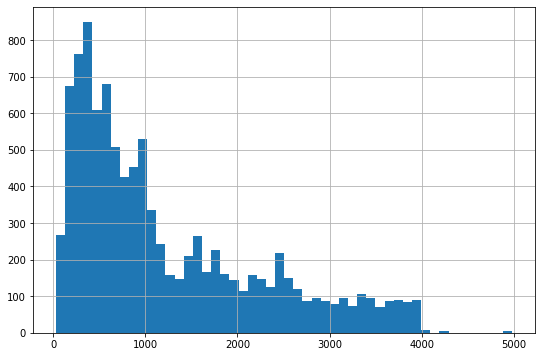

In [ ]:
df['Flight Distance'].hist(bins=50, figsize=(9,6))

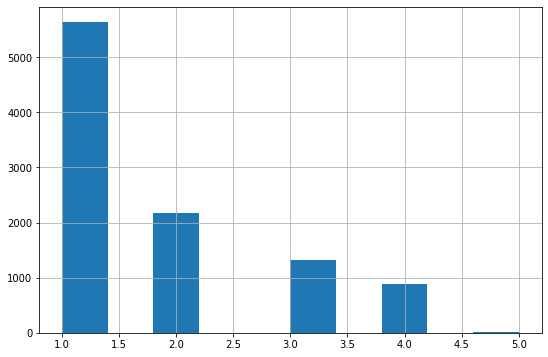

In [ ]:
df['distance_cat'] = pd.cut(df['Flight Distance'], bins=[0., 1000.0, 2000.0, 3000.0, 4000.0, np.inf], labels=[1,2,3,4,5])
df['distance_cat'].hist(figsize=(9,6))

In [ ]:
# median_ad = df['Arrival Delay in Minutes'].median()
# df['Arrival Delay in Minutes'].fillna(median_ad, inplace=True)

In [ ]:
df.drop(['Arrival Delay in Minutes'], axis=1, inplace=True)

In [ ]:
# df = df.astype({'Arrival Delay in Minutes': 'int64'})

In [ ]:
cols = ['Gender','Customer Type','Type of Travel','Class']
for i in cols:
    print(df[i].unique())

['Male' 'Female']
['disloyal Customer' 'Loyal Customer']
['Business travel' 'Personal Travel']
['Eco' 'Business' 'Eco Plus']


In [ ]:
df.replace({'Female':0, 'Male':1}, inplace=True)
df.replace({'disloyal Customer':0, 'Loyal Customer':1}, inplace=True)
df.replace({'Business travel':0, 'Personal Travel':1}, inplace=True)
df.replace({'Eco':0, 'Eco Plus':1, 'Business':2}, inplace=True)

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=33)

In [ ]:
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=33)

for train_index, test_index in strat_split.split(df,df['distance_cat']):
    strat_train = df.loc[train_index]
    strat_test = df.loc[test_index]

strat_train.drop('distance_cat', axis=1, inplace=True)
strat_test.drop('distance_cat', axis=1, inplace=True)

In [ ]:
strat_train.corrwith(strat_train['satisfaction']).abs().sort_values(ascending=False)

satisfaction                         1.000000
Class                                0.527742
Online boarding                      0.502644
Type of Travel                       0.483603
Inflight entertainment               0.398787
Seat comfort                         0.346127
On-board service                     0.328583
Leg room service                     0.327294
Cleanliness                          0.306683
Flight Distance                      0.300172
Inflight wifi service                0.274971
Baggage handling                     0.250452
Inflight service                     0.238177
Checkin service                      0.229406
Food and drink                       0.205826
Customer Type                        0.184710
Ease of Online booking               0.164337
Age                                  0.144681
Departure/Arrival time convenient    0.073458
Departure Delay in Minutes           0.037366
Gate location                        0.009902
Gender                            

In [ ]:
# imputer = SimpleImputer(strategy="median")
# imputer.fit(sat)
# X = imputer.transform(sat)

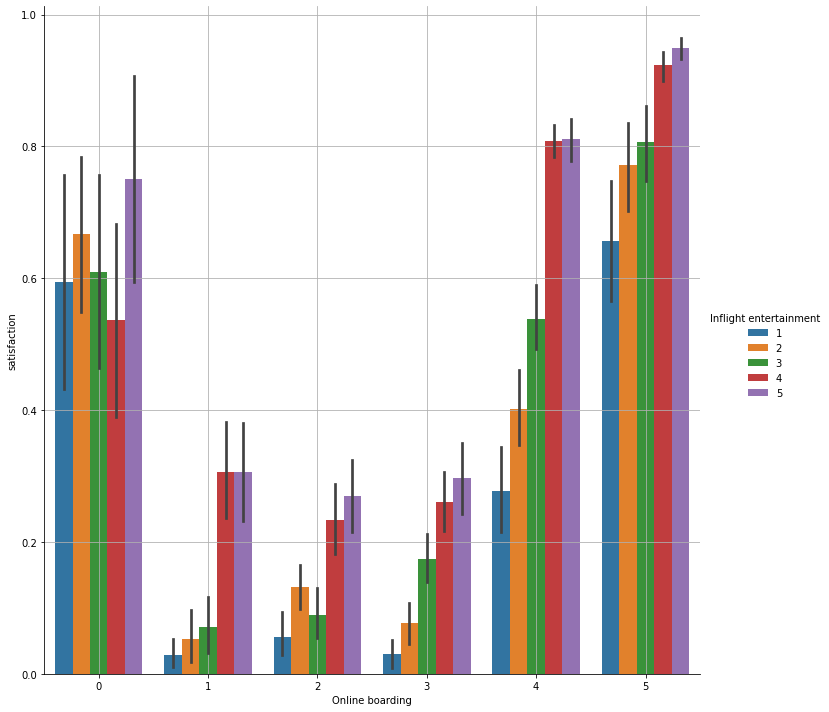

In [ ]:
sns.catplot(data=strat_train, kind='bar', x='Online boarding', y='satisfaction', hue='Inflight entertainment', height=10)
plt.grid()

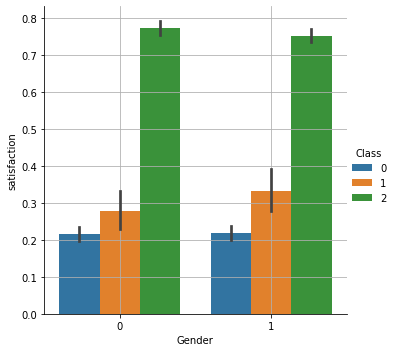

In [ ]:
sns.catplot(data=strat_train, kind='bar', x='Gender', y='satisfaction', hue='Class', height=5)
plt.grid()

In [ ]:
sat = strat_train.copy()

In [ ]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 2183 to 2340
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   id                                 8000 non-null   int64
 1   Gender                             8000 non-null   int64
 2   Customer Type                      8000 non-null   int64
 3   Age                                8000 non-null   int64
 4   Type of Travel                     8000 non-null   int64
 5   Class                              8000 non-null   int64
 6   Flight Distance                    8000 non-null   int64
 7   Inflight wifi service              8000 non-null   int64
 8   Departure/Arrival time convenient  8000 non-null   int64
 9   Ease of Online booking             8000 non-null   int64
 10  Gate location                      8000 non-null   int64
 11  Food and drink                     8000 non-null   int64
 12  Online boarding  

In [ ]:
sat['service'] = sat['Inflight wifi service']+sat['Inflight service']+sat['Checkin service']+sat['Leg room service']+sat['On-board service']+sat['Seat comfort']+sat['Cleanliness']+sat['Online boarding']+sat['Class']+sat['Customer Type']
sat['during'] = sat['Flight Distance']*sat['service']

In [ ]:
sat.corrwith(sat['satisfaction']).sort_values(ascending=False)

satisfaction                         1.000000
service                              0.616784
Class                                0.527742
Online boarding                      0.502644
during                               0.414396
Inflight entertainment               0.398787
Seat comfort                         0.346127
On-board service                     0.328583
Leg room service                     0.327294
Cleanliness                          0.306683
Flight Distance                      0.300172
Inflight wifi service                0.274971
Baggage handling                     0.250452
Inflight service                     0.238177
Checkin service                      0.229406
Food and drink                       0.205826
Customer Type                        0.184710
Ease of Online booking               0.164337
Age                                  0.144681
Gate location                        0.009902
id                                  -0.001550
Gender                            

In [ ]:
# sat_label = sat['satisfaction'].copy()
# sat.drop('satisfaction', axis=1, inplace=True)

X = sat.drop('satisfaction', axis=1)
y = sat['satisfaction'].copy()

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 2183 to 2340
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   id                                 8000 non-null   int64
 1   Gender                             8000 non-null   int64
 2   Customer Type                      8000 non-null   int64
 3   Age                                8000 non-null   int64
 4   Type of Travel                     8000 non-null   int64
 5   Class                              8000 non-null   int64
 6   Flight Distance                    8000 non-null   int64
 7   Inflight wifi service              8000 non-null   int64
 8   Departure/Arrival time convenient  8000 non-null   int64
 9   Ease of Online booking             8000 non-null   int64
 10  Gate location                      8000 non-null   int64
 11  Food and drink                     8000 non-null   int64
 12  Online boarding  

In [ ]:
customer_in, class_in, flight_in, wifi_in, online_in, seat_in, onboard_in, leg_in, checkin_in, inflight_in, clean_in, service_in, during_in = 2, 5, 6, 7, 12, 13, 15, 16, 18, 19, 20, 22, 23

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, flight_n_service=True):
        self.flight_n_service = flight_n_service
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        service = X[:,customer_in] + X[:,class_in] + X[:,wifi_in] + X[:,online_in] + X[:,seat_in]+ X[:,onboard_in] + X[:,leg_in] + X[:,checkin_in] + X[:,inflight_in] + X[:,clean_in]
        during = X[:,flight_in] * X[:,service_in]
        return np.c_[X, service, during]

In [ ]:
attr_adder = CombinedAttributesAdder(flight_n_service=True)
sat_extra_attrs = attr_adder.transform(X.values)
sat_extra_attrs[0,:]

array([ 2184,     1,     1,    23,     1,     0,  2227,     2,     3,
           2,     4,     1,     2,     2,     1,     3,     3,     4,
           4,     4,     1,     0,    22, 48994,    22, 48994])

In [ ]:
min_mix_scaler = MinMaxScaler()
min_mix_scaler.fit_transform(X)

array([[0.21824365, 1.        , 1.        , ..., 0.        , 0.34375   ,
        0.27935211],
       [0.43088618, 0.        , 1.        , ..., 0.        , 0.78125   ,
        0.2350538 ],
       [0.23084617, 0.        , 1.        , ..., 0.00760043, 0.78125   ,
        0.59514949],
       ...,
       [0.99369874, 1.        , 1.        , ..., 0.        , 0.6875    ,
        0.21953841],
       [0.83866773, 1.        , 1.        , ..., 0.01520087, 0.5       ,
        0.25679268],
       [0.23394679, 0.        , 1.        , ..., 0.19543974, 0.65625   ,
        0.06206733]])

In [ ]:
standart_scaler = StandardScaler()
standart_scaler.fit_transform(X)

array([[-0.98292281,  1.04396559,  0.45076429, ..., -0.36142276,
        -1.06015734,  0.34628029],
       [-0.24664478, -0.95788598,  0.45076429, ..., -0.36142276,
         1.15088922,  0.12459413],
       [-0.93928639, -0.95788598,  0.45076429, ..., -0.18752148,
         1.15088922,  1.92665446],
       ...,
       [ 1.70210237,  1.04396559,  0.45076429, ..., -0.36142276,
         0.67709353,  0.04694903],
       [ 1.16530513,  1.04396559,  0.45076429, ..., -0.0136202 ,
        -0.27049786,  0.23338403],
       [-0.92855044, -0.95788598,  0.45076429, ...,  4.11032446,
         0.51916163, -0.74109811]])

In [ ]:
pipeline = Pipeline([
          ('imputer', SimpleImputer(strategy='median')),
          ('attr_adder', CombinedAttributesAdder(flight_n_service=True)),
          ('min_max_scaler', MinMaxScaler())#,
        #   ('std_scaler', StandardScaler())             
])

In [ ]:
prepared = pipeline.fit_transform(X)
prepared

array([[0.21824365, 1.        , 1.        , ..., 0.27935211, 0.34375   ,
        0.27935211],
       [0.43088618, 0.        , 1.        , ..., 0.2350538 , 0.78125   ,
        0.2350538 ],
       [0.23084617, 0.        , 1.        , ..., 0.59514949, 0.78125   ,
        0.59514949],
       ...,
       [0.99369874, 1.        , 1.        , ..., 0.21953841, 0.6875    ,
        0.21953841],
       [0.83866773, 1.        , 1.        , ..., 0.25679268, 0.5       ,
        0.25679268],
       [0.23394679, 0.        , 1.        , ..., 0.06206733, 0.65625   ,
        0.06206733]])

In [ ]:
LR_model = LinearRegression()
LR_model.fit(prepared, y)

LinearRegression()

In [ ]:
test_data = X.sample(5)
test_data

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,service,during
8219,8220,1,1,49,0,2,3971,4,1,4,...,4,4,4,4,5,4,3,38,35,138985
5886,5887,0,1,58,1,1,102,4,4,4,...,1,1,4,1,3,1,2,0,23,2346
1688,1689,1,0,29,0,2,761,3,3,3,...,2,3,2,4,5,4,2,0,26,19786
6991,6992,1,1,36,0,2,509,5,5,5,...,5,5,5,5,2,5,4,14,38,19342
3490,3491,0,1,56,0,0,674,4,2,1,...,4,4,4,4,1,4,2,16,28,18872


In [ ]:
test_label = y.loc[test_data.index]
test_label

8219    1
5886    0
1688    0
6991    1
3490    1
Name: satisfaction, dtype: int64

In [ ]:
test_prepared = pipeline.transform(test_data)
test_prepared

array([[0.82196439, 1.        , 1.        , 0.57534247, 0.        ,
        1.        , 0.79563813, 0.8       , 0.2       , 0.8       ,
        0.75      , 0.8       , 0.8       , 0.8       , 0.75      ,
        0.75      , 0.8       , 0.75      , 1.        , 0.75      ,
        0.6       , 0.0412595 , 0.75      , 0.79936898, 0.75      ,
        0.79936898],
       [0.58861772, 0.        , 1.        , 0.69863014, 1.        ,
        0.5       , 0.01433764, 0.8       , 0.8       , 0.8       ,
        0.75      , 0.8       , 0.2       , 1.        , 0.        ,
        0.        , 0.8       , 0.        , 0.6       , 0.        ,
        0.4       , 0.        , 0.375     , 0.00979463, 0.375     ,
        0.00979463],
       [0.16873375, 1.        , 0.        , 0.30136986, 0.        ,
        1.        , 0.14741519, 0.6       , 0.6       , 0.6       ,
        0.        , 0.4       , 0.6       , 0.4       , 0.25      ,
        0.5       , 0.4       , 0.75      , 1.        , 0.75      ,
      

In [ ]:
predicted = LR_model.predict(test_prepared)
predicted

array([ 0.99327835, -0.08841541,  0.38727044,  1.00338322,  0.7406967 ])

In [ ]:
pd.DataFrame({'Forecast':predicted, 'Real score': test_label})

,Forecast,Real score
8219,0.993278,1
5886,-0.088415,0
1688,0.387270,0
6991,1.003383,1
3490,0.740697,1


In [ ]:
test.drop('distance_cat', axis=1, inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 5672 to 8908
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   id                                 2000 non-null   int64
 1   Gender                             2000 non-null   int64
 2   Customer Type                      2000 non-null   int64
 3   Age                                2000 non-null   int64
 4   Type of Travel                     2000 non-null   int64
 5   Class                              2000 non-null   int64
 6   Flight Distance                    2000 non-null   int64
 7   Inflight wifi service              2000 non-null   int64
 8   Departure/Arrival time convenient  2000 non-null   int64
 9   Ease of Online booking             2000 non-null   int64
 10  Gate location                      2000 non-null   int64
 11  Food and drink                     2000 non-null   int64
 12  Online boarding  

In [ ]:
test['service'] = test['Inflight wifi service']+test['Inflight service']+test['Checkin service']+test['Leg room service']+test['On-board service']+test['Seat comfort']+test['Cleanliness']+test['Online boarding']+test['Class']+test['Customer Type']
test['during'] = test['Flight Distance']*test['service']

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 5672 to 8908
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   id                                 2000 non-null   int64
 1   Gender                             2000 non-null   int64
 2   Customer Type                      2000 non-null   int64
 3   Age                                2000 non-null   int64
 4   Type of Travel                     2000 non-null   int64
 5   Class                              2000 non-null   int64
 6   Flight Distance                    2000 non-null   int64
 7   Inflight wifi service              2000 non-null   int64
 8   Departure/Arrival time convenient  2000 non-null   int64
 9   Ease of Online booking             2000 non-null   int64
 10  Gate location                      2000 non-null   int64
 11  Food and drink                     2000 non-null   int64
 12  Online boarding  

In [ ]:
customer_in, class_in, flight_in, wifi_in, online_in, seat_in, onboard_in, leg_in, checkin_in, inflight_in, clean_in, service_in, during_in = 2, 5, 6, 7, 12, 13, 15, 16, 18, 19, 20, 23, 24

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, flight_n_service=True):
        self.flight_n_service = flight_n_service
    def fit(self, test, y=None):
        return self
    def transform(self, test):
        service = test[:,customer_in] + test[:,class_in] + test[:,wifi_in] + test[:,online_in] + test[:,seat_in]+ test[:,onboard_in] + test[:,leg_in] + test[:,checkin_in] + test[:,inflight_in] + test[:,clean_in]
        during = test[:,flight_in] * test[:,service_in]
        return np.c_[test, service, during]

In [ ]:
X_test = test.drop('satisfaction', axis=1)
X_test

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,service,during
5672,5673,0,1,54,0,1,89,5,2,2,...,5,5,5,5,5,5,5,0,38,3382
3346,3347,0,1,60,0,2,1908,3,3,3,...,4,4,4,4,4,4,3,0,33,62964
5867,5868,1,1,34,0,2,3264,3,4,4,...,3,3,3,3,1,3,3,57,26,84864
2322,2323,1,1,52,0,0,1174,1,2,2,...,1,3,4,4,2,3,1,0,17,19958
5233,5234,0,1,44,0,2,1521,5,5,5,...,5,5,5,5,4,5,5,85,34,51714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,2287,0,1,32,0,0,204,2,2,2,...,2,4,2,4,3,4,2,0,22,4488
6050,6051,0,1,56,0,2,2139,2,2,2,...,5,5,5,5,5,5,4,3,37,79143
2538,2539,0,0,30,0,2,992,1,0,0,...,2,4,2,5,3,5,2,0,21,20832
4877,4878,1,1,20,1,0,867,5,4,5,...,3,4,5,5,3,5,3,31,34,29478


In [ ]:
y_test = test['satisfaction'].copy()
y_test

5672    1
3346    1
5867    0
2322    0
5233    1
       ..
2286    0
6050    1
2538    0
4877    1
8908    0
Name: satisfaction, Length: 2000, dtype: int64

In [ ]:
X_test_prepared = pipeline.transform(X_test)

In [ ]:
y_predicted = LR_model.predict(X_test_prepared)

In [ ]:
lin_mse = mean_squared_error(y_test, y_predicted)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

220.7781761436986


In [ ]:
# satis.info()

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 5672 to 8908
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   id                                 2000 non-null   int64
 1   Gender                             2000 non-null   int64
 2   Customer Type                      2000 non-null   int64
 3   Age                                2000 non-null   int64
 4   Type of Travel                     2000 non-null   int64
 5   Class                              2000 non-null   int64
 6   Flight Distance                    2000 non-null   int64
 7   Inflight wifi service              2000 non-null   int64
 8   Departure/Arrival time convenient  2000 non-null   int64
 9   Ease of Online booking             2000 non-null   int64
 10  Gate location                      2000 non-null   int64
 11  Food and drink                     2000 non-null   int64
 12  Online boarding  

test['service'] = test['Inflight wifi service']+test['Inflight service']+test['Checkin service']+test['Leg room service']+test['On-board service']+test['Seat comfort']+test['Cleanliness']+test['Online boarding']+test['Class']+test['Customer Type']
test['during'] = test['Flight Distance']*test['service']

In [ ]:
customer_in, class_in, flight_in, wifi_in, online_in, seat_in, onboard_in, leg_in, checkin_in, inflight_in, clean_in, service_in, during_in = 2, 5, 6, 7, 12, 13, 15, 16, 18, 19, 20, 24, 25

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, flight_n_service=True):
        self.flight_n_service = flight_n_service
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        service = X[:,customer_in] + X[:,class_in] + X[:,wifi_in] + X[:,online_in] + X[:,seat_in]+ X[:,onboard_in] + X[:,leg_in] + X[:,checkin_in] + X[:,inflight_in] + X[:,clean_in]
        during = X[:,flight_in] * X[:,service_in]
        return np.c_[X, service, during]

DecisionTree

In [ ]:
Tree_model = DecisionTreeRegressor()
Tree_model.fit(prepared, satis_labels)

DecisionTreeRegressor()

In [ ]:
y_predicted = Tree_model.predict(X_test_prepared)

In [ ]:
lin_mse = mean_squared_error(y_test, y_predicted)
lin_rmse = np.sqrt(lin_mse)
print(f'accuracy: {1-lin_rmse}')

accuracy: 0.8460823272005453


RandomForest

In [ ]:
RF_model = RandomForestRegressor()
RF_model.fit(prepared, satis_labels)

RandomForestRegressor()

In [ ]:
y_predicted = RF_model.predict(X_test_prepared)
lin_mse = mean_squared_error(y_test, y_predicted)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

0.1539176727994547


Cross-Validation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   id                                 10000 non-null  int64   
 1   Gender                             10000 non-null  int64   
 2   Customer Type                      10000 non-null  int64   
 3   Age                                10000 non-null  int64   
 4   Type of Travel                     10000 non-null  int64   
 5   Class                              10000 non-null  int64   
 6   Flight Distance                    10000 non-null  int64   
 7   Inflight wifi service              10000 non-null  int64   
 8   Departure/Arrival time convenient  10000 non-null  int64   
 9   Ease of Online booking             10000 non-null  int64   
 10  Gate location                      10000 non-null  int64   
 11  Food and drink                     10000 n

In [ ]:
X = df.drop('satisfaction', axis=1)
y = df['satisfaction'].copy()

X_prepared = pipeline.transform(X)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- distance_cat
Feature names seen at fit time, yet now missing:
- during
- service

  warnings.warn(message, FutureWarning)


ValueError: ignored